Created on Tue Apr 02 17:57 2019

Plot Figure A1

@author: Clara Burgard

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import seaborn as sns

In [2]:
sns.set_context('paper')

In [3]:
obs_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/observations/'
mod_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/simulated_TBs/'
orig_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/assimilation_runs/'
plot_path = '/work/mh0033/m300411/SatSim/PLOTS/'

READ IN THE DATA

In [4]:
obs = xr.open_dataset(os.path.abspath(obs_inputpath+'AMSRE_N25km_06V_E_2004-2008_modgrid.nc'))

lon = obs['lon']
lat = obs['lat']

TB_mod_SICCI = xr.open_dataset(os.path.abspath(mod_inputpath+'20190131-1631/mergetime/TBtot_assim_2004-2008_7_dayavg.nc'))
TB_mod_NT = xr.open_dataset(os.path.abspath(mod_inputpath+'20190131-1633/mergetime/TBtot_assim_2004-2008_7_dayavg.nc'))
TB_mod_BT = xr.open_dataset(os.path.abspath(mod_inputpath+'20190131-1632/mergetime/TBtot_assim_2004-2008_7_dayavg.nc'))

TB_mod_SICCI_ut = xr.open_dataset(os.path.abspath(mod_inputpath+'20190402-1210/mergetime/TBtot_assim_2004-2008_7_dayavg.nc'))
TB_mod_NT_ut = xr.open_dataset(os.path.abspath(mod_inputpath+'20190402-1208/mergetime/TBtot_assim_2004-2008_7_dayavg.nc'))
TB_mod_BT_ut = xr.open_dataset(os.path.abspath(mod_inputpath+'20190402-1207/mergetime/TBtot_assim_2004-2008_7_dayavg.nc'))

TB_mod_SICCI['time'] = TB_mod_SICCI.indexes['time'].round('D')
TB_mod_NT['time'] = TB_mod_NT.indexes['time'].round('D')
TB_mod_BT['time'] = TB_mod_BT.indexes['time'].round('D')

TB_mod_SICCI_ut['time'] = TB_mod_SICCI_ut.indexes['time'].round('D')
TB_mod_NT_ut['time'] = TB_mod_NT_ut.indexes['time'].round('D')
TB_mod_BT_ut['time'] = TB_mod_BT_ut.indexes['time'].round('D')

TB_obs = obs['TB']
TBV_mod_SICCI = TB_mod_SICCI['TBV'].sel(time=TB_obs.time)
TBV_mod_NT = TB_mod_NT['TBV'].sel(time=TB_obs.time)
TBV_mod_BT = TB_mod_BT['TBV'].sel(time=TB_obs.time)
TBV_mod_SICCI_ut = TB_mod_SICCI_ut['TBV'].sel(time=TB_obs.time)
TBV_mod_NT_ut = TB_mod_NT_ut['TBV'].sel(time=TB_obs.time)
TBV_mod_BT_ut = TB_mod_BT_ut['TBV'].sel(time=TB_obs.time)


PLOT FIGURE A1b

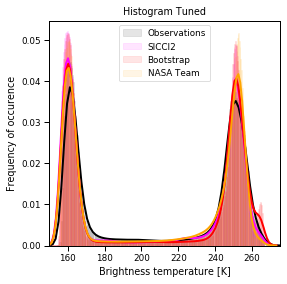

In [5]:
# prepare the distributions
y = TB_obs.where(TBV_mod_SICCI>0).values.flatten()
mask = ~np.isnan(y)
y2 = TBV_mod_SICCI.values.flatten()
mask2 = ~np.isnan(y2)
y3 = TBV_mod_BT.values.flatten()
mask3 = ~np.isnan(y3)
y4 = TBV_mod_NT.values.flatten()
mask4 = ~np.isnan(y4)

plt.figure(figsize=(8.27/2,8.27/2))
sns.distplot(y[mask], hist=True, kde=True, 
             bins=300, color = 'black', 
             hist_kws={'edgecolor':'black',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='Observations')
sns.distplot(y2[mask2], hist=True, kde=True, 
             bins=300, color = 'magenta', 
             hist_kws={'edgecolor':'magenta',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='SICCI2')
sns.distplot(y3[mask3], hist=True, kde=True, 
             bins=300, color = 'red', 
             hist_kws={'edgecolor':'red',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='Bootstrap')
sns.distplot(y4[mask4], hist=True, kde=True, 
             bins=300, color = 'orange', 
             hist_kws={'edgecolor':'orange',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='NASA Team')

# Add labels
plt.title('Histogram Tuned')
plt.ylabel('Frequency of occurence')
plt.xlabel('Brightness temperature [K]')
plt.xlim(150,275)
plt.legend()
#plt.savefig(plot_path+'density_distrib_tuned.pdf',bbox_inches='tight',dpi=250)

PLOT FIGURE A1a

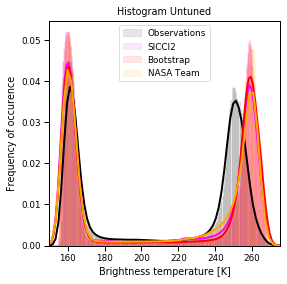

In [6]:
# prepare the distributions
y = TB_obs.where(TBV_mod_SICCI>0).values.flatten()
mask = ~np.isnan(y)
y2 = TBV_mod_SICCI_ut.values.flatten()
mask2 = ~np.isnan(y2)
y3 = TBV_mod_BT_ut.values.flatten()
mask3 = ~np.isnan(y3)
y4 = TBV_mod_NT_ut.values.flatten()
mask4 = ~np.isnan(y4)

plt.figure(figsize=(8.27/2,8.27/2))
sns.distplot(y[mask], hist=True, kde=True, 
             bins=300, color = 'black', 
             hist_kws={'edgecolor':'black',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='Observations')
sns.distplot(y2[mask2], hist=True, kde=True, 
             bins=300, color = 'magenta', 
             hist_kws={'edgecolor':'magenta',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='SICCI2')
sns.distplot(y3[mask3], hist=True, kde=True, 
             bins=300, color = 'red', 
             hist_kws={'edgecolor':'red',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='Bootstrap')
sns.distplot(y4[mask4], hist=True, kde=True, 
             bins=300, color = 'orange', 
             hist_kws={'edgecolor':'orange',"alpha": 0.1},
             kde_kws={'linewidth': 2},
             label='NASA Team')

# Add labels
plt.title('Histogram Untuned')
plt.ylabel('Frequency of occurence')
plt.xlabel('Brightness temperature [K]')
plt.xlim(150,275)
plt.legend()
#plt.savefig(plot_path+'density_distrib_untuned.pdf',bbox_inches='tight',dpi=250)